In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Import Library

Pada tahap awal, dilakukan import library yang dibutuhkan:
- **pandas** → untuk mengelola dan menganalisis data,
- **matplotlib.pyplot** dan **seaborn** → untuk membuat visualisasi data.

Library ini akan digunakan sepanjang eksplorasi untuk membaca dataset, menghitung statistik, serta membuat grafik.


In [3]:


df = pd.read_csv("synthetic_coffee_health_10000.csv")

print(df.head())

   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2          Fair  22.7          59       Medium                     11.2   
3          Good  24.7          71          Low                      6.6   
4          Fair  24.1          76       Medium                      8.5   

  Health_Issues Occupation  Smoking  Alcohol_Consumption  
0           NaN      Other        0                    0 

## Load Dataset dan Menampilkan Data Awal

Dataset **Global Coffee Health** dimuat menggunakan fungsi `pandas.read_csv()`.  
Setelah itu, ditampilkan **5 baris pertama** dengan `head()` untuk memahami struktur data.

Tujuan langkah ini adalah:
- Memastikan dataset berhasil dibaca dengan benar.
- Memberikan gambaran awal mengenai atribut yang tersedia, termasuk tipe data dan isi dari setiap kolom.


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [5]:
df.shape

(10000, 16)

In [6]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [7]:
df.isnull().sum()

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

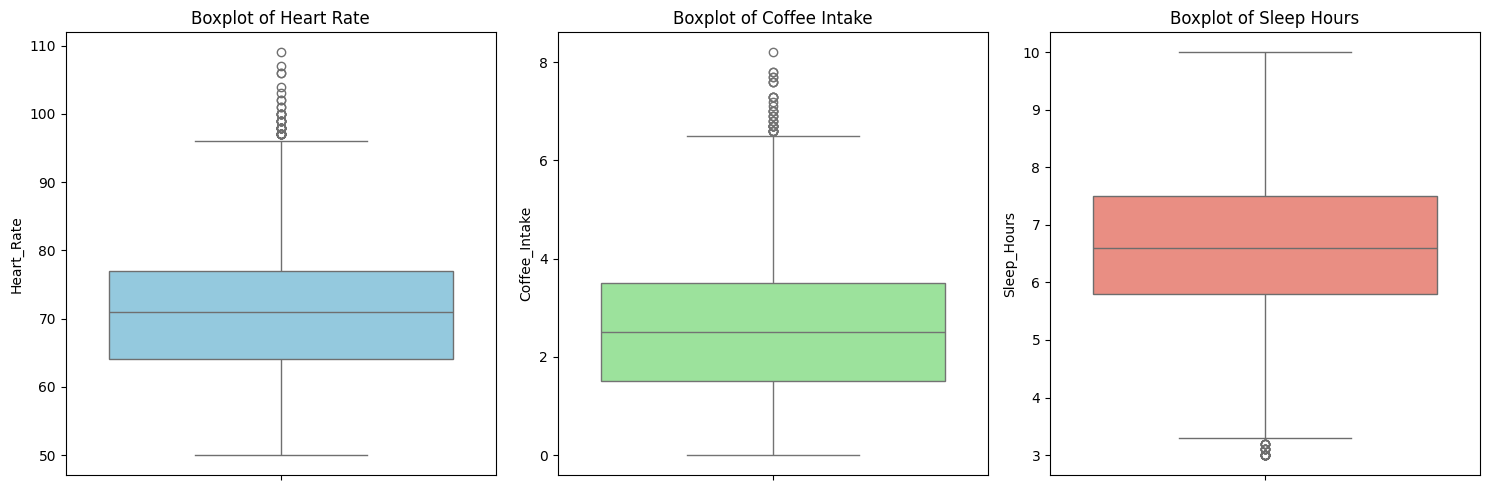

In [8]:
plt.figure(figsize=(15,5))

# Heart Rate
plt.subplot(1,3,1)
sns.boxplot(y=df['Heart_Rate'], color='skyblue')
plt.title("Boxplot of Heart Rate")

# Coffee Intake
plt.subplot(1,3,2)
sns.boxplot(y=df['Coffee_Intake'], color='lightgreen')
plt.title("Boxplot of Coffee Intake")

# Sleep Hours
plt.subplot(1,3,3)
sns.boxplot(y=df['Sleep_Hours'], color='salmon')
plt.title("Boxplot of Sleep Hours")

plt.tight_layout()
plt.show()


## Deteksi dan Penanganan Outlier

### Hasil Deteksi
Melalui visualisasi **boxplot**, ditemukan adanya beberapa outlier pada atribut berikut:
- **Heart_Rate**: terdapat nilai di atas 95 bpm, dengan maksimum mencapai 109 bpm.
- **Coffee_Intake**: terdapat responden dengan konsumsi lebih dari 6 cangkir per hari, maksimum mencapai 8.2 cangkir.
- **Sleep_Hours**: distribusi relatif stabil, tidak ditemukan outlier signifikan (range 3–10 jam masih masuk kategori normal).

### Bukti dan Alasan Batas Wajar
- **Heart Rate**: Literatur medis menyebutkan rentang detak jantung normal orang dewasa adalah **60–100 bpm (resting heart rate)**. Nilai 95–109 bpm yang terdeteksi masih berada dalam batas fisiologis, khususnya pada individu yang sedang stres, mengonsumsi kafein tinggi, atau memiliki kondisi kesehatan tertentu. Oleh karena itu, outlier ini masih realistis dan tidak perlu dihapus.
  
- **Coffee Intake**: Konsumsi kopi normal bervariasi antar individu. Penelitian kesehatan menunjukkan konsumsi kafein hingga **400 mg per hari (~4–5 cangkir kopi)** masih dianggap aman untuk orang dewasa sehat. Dataset menunjukkan beberapa individu minum hingga 8 cangkir (setara ±700–800 mg kafein). Walaupun tinggi, angka ini masih mungkin terjadi dalam kehidupan nyata (heavy coffee drinker). Jadi, nilai ini tetap dianggap wajar sebagai variasi ekstrem.
  
- **Sleep Hours**: Nilai minimum 3 jam dan maksimum 10 jam masih masuk rentang pola tidur manusia di dunia nyata. Meskipun ekstrem, 3 jam tidur dapat terjadi pada kasus insomnia, dan 10 jam dapat terjadi pada orang yang sangat lelah. Dengan demikian, tidak perlu dihapus.

### Keputusan Penanganan
Karena outlier yang ditemukan masih merepresentasikan **variasi nyata pada populasi**, maka:
- **Tidak dilakukan penghapusan atau transformasi data.**
- Outlier tetap disertakan dalam analisis untuk memberikan gambaran lengkap mengenai distribusi data.

Dengan langkah ini, analisis tetap mencerminkan kondisi sebenarnya tanpa menghilangkan informasi penting dari responden unik.


In [9]:
df = df.drop(columns=['Health_Issues'])


## Penanganan Missing Value

Berdasarkan hasil eksplorasi awal, ditemukan adanya nilai yang hilang (missing value) pada kolom **`Health_Issues`**.  
Jumlah non-null untuk atribut tersebut hanya sekitar **4.059 dari 10.000 baris data**, artinya lebih dari **50% data hilang**.

### Keputusan Penanganan
Karena:
- Proporsi nilai hilang terlalu besar,
- Kolom **`Health_Issues`** tidak termasuk dalam fokus analisis utama praktikum (atribut utama adalah `Heart_Rate`, `Coffee_Intake`, `Sleep_Hours`, dan `Sleep_Quality`),

maka kolom **`Health_Issues`** dihapus dari dataset.  
Langkah ini dipilih untuk menjaga kualitas analisis, sekaligus menyederhanakan dataset agar lebih fokus pada atribut yang relevan.

```python
# Menghapus kolom Health_Issues karena terlalu banyak missing values
df = df.drop(columns=['Health_Issues'])


## Visualisasi Utama

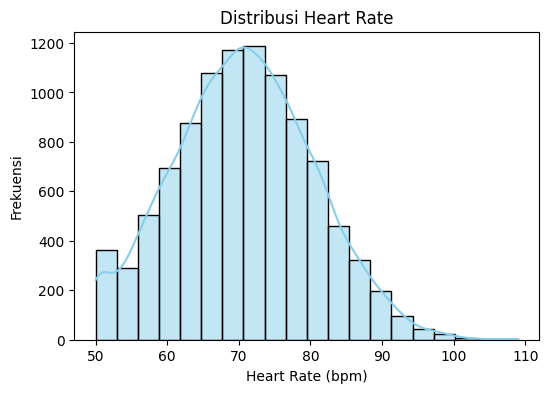

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['Heart_Rate'], bins=20, kde=True, color='skyblue')
plt.title("Distribusi Heart Rate")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Frekuensi")
plt.show()


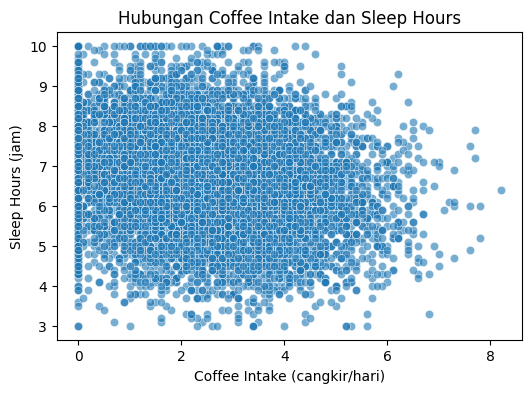

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Coffee_Intake', y='Sleep_Hours', data=df, alpha=0.6)
plt.title("Hubungan Coffee Intake dan Sleep Hours")
plt.xlabel("Coffee Intake (cangkir/hari)")
plt.ylabel("Sleep Hours (jam)")
plt.show()


C:\Users\radit\AppData\Local\Temp\ipykernel_2084\2764916694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep_Quality', data=df, palette='viridis')


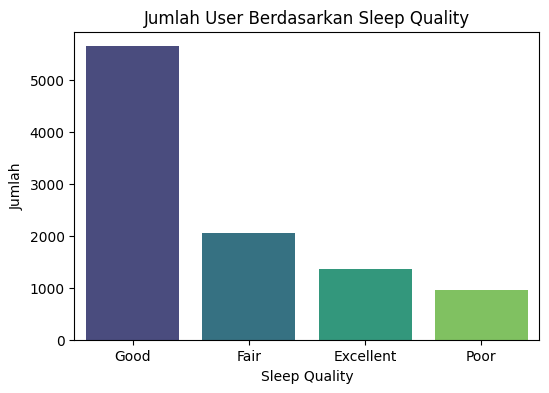

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sleep_Quality', data=df, palette='viridis')
plt.title("Jumlah User Berdasarkan Sleep Quality")
plt.xlabel("Sleep Quality")
plt.ylabel("Jumlah")
plt.show()
